# Case Study: Revenue by Product and Year

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Removed headers and blank columns in excel before exporting to csv

In [2]:
raw_rev = pd.read_csv('revenue_cleaned.csv')
# Get a general idea of customers linked to each product group
counts = raw_rev.groupby(['Product Group'])['Cust_ID'].count()
counts


Product Group
FraudFinder         2544
FraudFinder 2.0.    2725
Other                541
Name: Cust_ID, dtype: int64

In [3]:
# Look at the total number of entries
rev=raw_rev.set_index('Cust_ID')
len(rev)

5810

In [4]:
rev.head(1)

,Product Group,1/1/2010,2/1/2010,3/1/2010,4/1/2010,5/1/2010,6/1/2010,7/1/2010,8/1/2010,9/1/2010,...,9/1/2012,10/1/2012,11/1/2012,12/1/2012,1/1/2013,2/1/2013,3/1/2013,4/1/2013,5/1/2013,6/1/2013
Cust_ID,,,,,,,,,,,,,,,,,,,,,
CUSTOMER 1,FraudFinder 2.0.,172.24,172.24,172.24,172.24,172.24,172.24,172.24,172.24,172.24,...,217.91,217.91,217.92,239.7,239.7,239.7,239.7,239.7,239.7,239.7


In [5]:
# Create quarterly summary columns because most shifts from one subscription to another occur over quarters
y10_1 = rev.columns.values[1:4]
y10_2 = rev.columns.values[4:7]
y10_3 = rev.columns.values[7:10]
y10_4 = rev.columns.values[10:13]
y11_1 = rev.columns.values[13:16]
y11_2 = rev.columns.values[16:19]
y11_3 = rev.columns.values[19:22]
y11_4 = rev.columns.values[22:25]
y12_1 = rev.columns.values[25:28]
y12_2 = rev.columns.values[28:31]
y12_3 = rev.columns.values[31:34]
y12_4 = rev.columns.values[34:37]
y13_1 = rev.columns.values[37:40]
y13_2 = rev.columns.values[40:43]

In [6]:
# Create the sum of revenue per quarter columns
rev['2010 Q1'] = rev[y10_1].sum(axis=1)
rev['2010 Q2'] = rev[y10_2].sum(axis=1)
rev['2010 Q3'] = rev[y10_3].sum(axis=1)
rev['2010 Q4'] = rev[y10_4].sum(axis=1)
rev['2011 Q1'] = rev[y11_1].sum(axis=1)
rev['2011 Q2'] = rev[y11_2].sum(axis=1)
rev['2011 Q3'] = rev[y11_3].sum(axis=1)
rev['2011 Q4'] = rev[y11_4].sum(axis=1)
rev['2012 Q1'] = rev[y12_1].sum(axis=1)
rev['2012 Q2'] = rev[y12_2].sum(axis=1)
rev['2012 Q3'] = rev[y12_3].sum(axis=1)
rev['2012 Q4'] = rev[y12_4].sum(axis=1)
rev['2013 Q1'] = rev[y13_1].sum(axis=1)
rev['2013 Q2'] = rev[y13_2].sum(axis=1)

In [7]:
quarterly = rev.iloc[:,43:57]
quarterly['Product Group'] = rev['Product Group']
revsum = quarterly.groupby('Product Group').sum()
revsum 

,2010 Q1,2010 Q2,2010 Q3,2010 Q4,2011 Q1,2011 Q2,2011 Q3,2011 Q4,2012 Q1,2012 Q2,2012 Q3,2012 Q4,2013 Q1,2013 Q2
Product Group,,,,,,,,,,,,,,
FraudFinder,1448078.45,1376614.23,1348205.91,1327847.78,1248881.45,1233196.51,1129251.33,1019023.13,928592.89,870948.21,827753.19,809295.36,785994.51,771339.66
FraudFinder 2.0.,1567073.61,1643669.50,1768096.82,1978093.14,2116815.45,2302170.66,2445518.24,2632327.37,2814206.67,2913686.26,3111064.59,3292963.45,3251793.89,3422442.84
Other,88375.76,145609.35,149747.68,134339.55,145748.43,131039.19,158189.88,309856.51,233171.51,350510.34,350262.00,336446.28,459837.89,432360.92


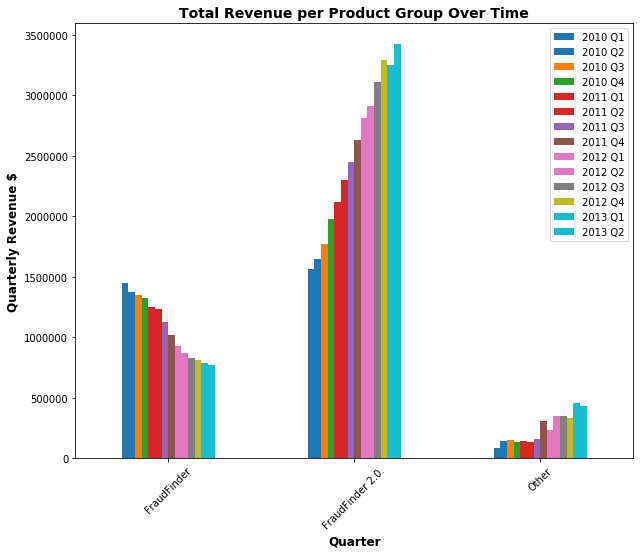

In [8]:
revsum.plot(kind='bar', figsize=(10,8), legend='brief', colormap='tab10', rot=45)
plt.xlabel('Quarter', fontsize=12, fontweight='bold')
plt.ylabel('Quarterly Revenue $', fontsize=12, fontweight='bold')
plt.title('Total Revenue per Product Group Over Time', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.savefig('./revenue_summary.png',transparent=False, dpi=80, bbox_inches="tight")

In [9]:
### Looking at change of product use over time, assuming zero revenue means no use

In [10]:
def productuse(adf):
    first_half_years = ['1/1/2010','6/1/2010','1/1/2011','6/1/2011','1/1/2012','6/1/2012','1/1/2013','6/1/2013']
    for item in first_half_years:
        print(item)
        adf[item] = (rev.loc[rev[item] > 0]).reset_index().groupby('Product Group')['Cust_ID'].count()
        

In [11]:
adf = pd.DataFrame()
productuse(adf)
adf

1/1/2010
6/1/2010
1/1/2011
6/1/2011
1/1/2012
6/1/2012
1/1/2013
6/1/2013


,1/1/2010,6/1/2010,1/1/2011,6/1/2011,1/1/2012,6/1/2012,1/1/2013,6/1/2013
Product Group,,,,,,,,
FraudFinder,2506,2232,1851,1537,1141,985,855,775
FraudFinder 2.0.,1381,1435,1678,1800,2001,2074,2087,2108
Other,49,72,63,60,44,48,85,57


/Users/laura/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


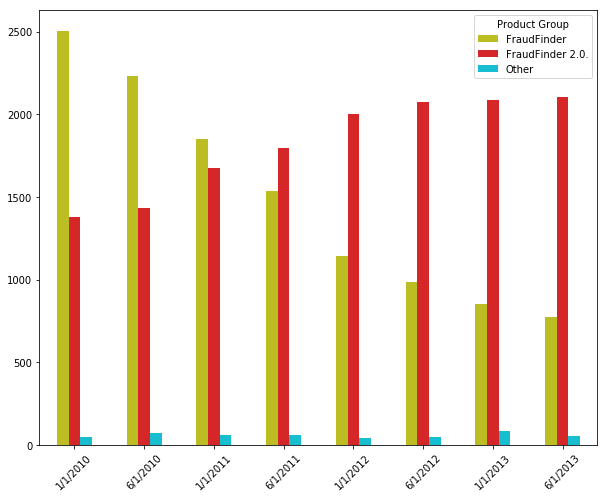

In [12]:
adf = adf.transpose()
adf.plot(kind='bar', figsize=(10,8), legend=True, colors=['tab:olive','tab:red','tab:cyan'], rot=45)
# plt.xlabel('Quarter', fontsize=12, fontweight='bold')
# plt.ylabel('Quarterly Revenue $', fontsize=12, fontweight='bold')
# plt.title('Total Revenue per Product Group Over Time', fontsize=14, fontweight='bold')
# plt.legend(loc='best')
# plt.savefig('./revenue_summary.png',transparent=False, dpi=80, bbox_inches="tight")

In [29]:
first = rev.loc[rev['1/1/2010'] > 0]
first = first.reset_index()
prod1 = first.groupby('Product Group')['Cust_ID'].count()

prod1.sum()

3936

In [30]:
values = prod1.values
labels = ["FraudFinder","FraudFinder2.0", "Other"]
colors = ["tab:olive",'tab:red',"tab:cyan"]
explode = (0.1,0,0)

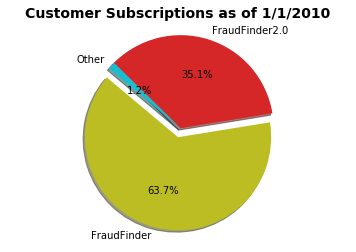

In [31]:
plt.title('Customer Subscriptions as of 1/1/2010', fontsize=14, fontweight='bold')
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig('./product_count.png',transparent=False, dpi=80, bbox_inches="tight")

In [32]:

last = rev.loc[rev['6/1/2013'] > 0]
last = last.reset_index()
prod2 = last.groupby('Product Group')['Cust_ID'].count()
prod2.sum()


2940

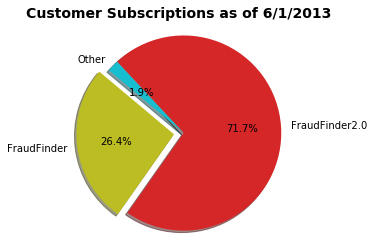

In [165]:
values = prod2.values
labels = ["FraudFinder","FraudFinder2.0", "Other"]
colors = ['tab:olive','tab:red',"tab:cyan"]
explode = (0.1,0,0)
plt.title('Customer Subscriptions as of 6/1/2013', fontsize=14, fontweight='bold')
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig('./product_count_last.png',transparent=False, dpi=80, bbox_inches="tight")

In [166]:
f1_totals.head()

,2010 Q1,2010 Q2,2010 Q3,2010 Q4,2011 Q1,2011 Q2,2011 Q3,2011 Q4,2012 Q1,2012 Q2,2012 Q3,2012 Q4,2013 Q1,2013 Q2
Cust_ID,,,,,,,,,,,,,,
CUSTOMER 2,272.46,299.61,299.61,299.61,299.62,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CUSTOMER 4,265.74,265.74,299.21,366.15,366.15,366.15,244.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CUSTOMER 10,242.13,242.13,242.13,242.13,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CUSTOMER 11,272.43,272.44,181.65,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CUSTOMER 12,288.18,192.12,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
pos = []
neg = []
zero = []
date = []
prod = []

for col in f1_totals.columns.values:
    pos.append(len(f1_totals.loc[f1_totals[col] > 0]))
    neg.append(len(f1_totals.loc[f1_totals[col] < 0]))
    zero.append(len(f1_totals.loc[f1_totals[col] == 0]))
    date.append(col.split(' ')[0])
    prod.append('FF')
    
for col in f2_totals.columns.values:
    pos.append(len(f2_totals.loc[f2_totals[col] > 0]))
    neg.append(len(f2_totals.loc[f2_totals[col] < 0]))
    zero.append(len(f2_totals.loc[f2_totals[col] == 0]))
    date.append(col.split(' ')[0])
    prod.append('FF2')
for col in o_totals.columns.values:
    pos.append(len(o_totals.loc[o_totals[col] > 0]))
    neg.append(len(o_totals.loc[o_totals[col] < 0]))
    zero.append(len(o_totals.loc[o_totals[col] == 0]))
    date.append(col.split(' ')[0])
    prod.append('Other')

In [213]:
ff1 = pd.DataFrame()
ff1['Positive Revenue'] = pos
ff1['Negative Revenue'] = neg
ff1['No Revenue'] = zero
ff1['Quarter'] = date
ff1['Product'] = prod

In [ ]:
ffg = ff1.groupby(['Quarter','Product']).sum()
ffg = ffg.reset_index()
ffg=ffg.sort_values(by=['Product','Quarter'])
ffg=ffg.reset_index()

In [236]:
ffg = ffg.drop('index',axis=1)
ffg

,Quarter,Product,Positive Revenue,Negative Revenue,No Revenue
0,2010,FF,8985,104,1087
1,2011,FF,6207,77,3892
2,2012,FF,4016,16,6144
3,2013,FF,1647,17,3424
4,2010,FF2,6099,57,4744
5,2011,FF2,7508,28,3364
6,2012,FF2,8386,18,2496
7,2013,FF2,4260,21,1169
8,2010,Other,293,12,1859
9,2011,Other,354,113,1697


In [242]:
ffg = ffg.rename(columns={'Quarter':'Year'})
ffg = ffg.set_index(['Year','Product'])

In [218]:
ffg.sort_values(by=['Product','Quarter'])
ffg

Positive Revenue  Negative Revenue  No Revenue
Quarter Product                                                
2010    FF                   8985               104        1087
        FF2                  6099                57        4744
        Other                 293                12        1859
2011    FF                   6207                77        3892
        FF2                  7508                28        3364
        Other                 354               113        1697
2012    FF                   4016                16        6144
        FF2                  8386                18        2496
        Other                 229                90        1845
2013    FF                   1647                17        3424
        FF2                  4260                21        1169
        Other                 155               100         827